In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline 
np.random.seed = 1
N = 1000
fs = 500
w = np.arange(1,N+1) * 2 * np.pi/fs
t = np.arange(1,N+1)/fs
x = 0.75 * np.sin(w*5)
y = signal.sawtooth(w*7, 0.5)
d1 = 0.5*y   + 0.5*x   + 0.1*np.random.rand(1,N)
d2 = 0.2*y   + 0.75*x  + 0.15*np.random.rand(1,N)
d3 = 0.7*y   + 0.25*x  + 0.1*np.random.rand(1,N)
d4 = -0.5*y  + 0.4*x   + 0.2*np.random.rand(1,N)
d5 = 0.6*np.random.rand(1,N)


d1 = d1 - d1.mean()
d2 = d2 - d2.mean()
d3 = d3 - d3.mean()
d4 = d4 - d4.mean()
d5 = d5 - d5.mean()

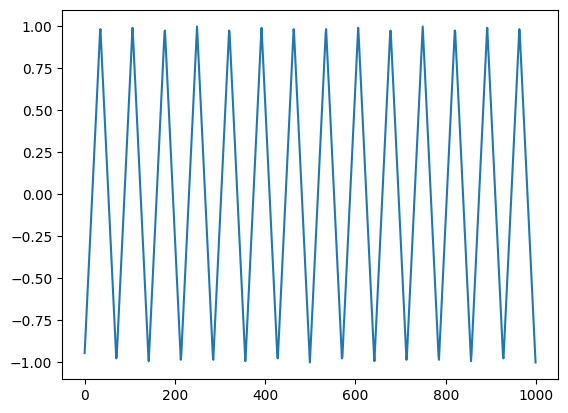

In [3]:
plt.plot(y)

In [4]:
import numpy as np
X = np.array([d1[0], d2[0], d3[0], d4[0], d5[0]])
X
X.shape

array([[-0.41366142, -0.40868742, -0.3371509 , ..., -0.51952912,
        -0.50115693, -0.53524933],
       [-0.16347319, -0.12800941, -0.04761012, ..., -0.30853374,
        -0.2551455 , -0.17077951],
       [-0.63151308, -0.64156838, -0.56515654, ..., -0.61474061,
        -0.64578092, -0.7109142 ],
       [ 0.59175403,  0.45811602,  0.43536858, ...,  0.44919534,
         0.52273516,  0.51467923],
       [-0.26904996, -0.09558288,  0.27170244, ...,  0.17419136,
         0.08242948,  0.12811258]])

(5, 1000)

In [5]:
U,S,V = np.linalg.svd(X)
S

array([20.9104619 , 14.21354458,  5.47811717,  1.47559098,  0.93952827])

In [6]:
eigen = S**2
eigen

array([437.24741676, 202.02484945,  30.00976774,   2.17736875,
         0.88271337])

In [7]:
eigen = eigen/N
eigen = eigen/sum(eigen)
eigen

array([0.65033471, 0.30047924, 0.04463467, 0.00323848, 0.00131289])

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
iris = datasets.load_iris()
X = iris.data[:50,:] 
X2 = X +0.k*np.random.rand(50,4)
X_combined = np.zeros((50,8))
X_combined[:,0:4] = X
X_combined[:,4:] = X2
X_combined

array([[5.1       , 3.5       , 1.4       , 0.2       , 5.11407634,
        3.52415584, 1.41192633, 0.20513799],
       [4.9       , 3.        , 1.4       , 0.2       , 4.9043638 ,
        3.00779053, 1.42730345, 0.20576075],
       [4.7       , 3.2       , 1.3       , 0.2       , 4.74751109,
        3.24113573, 1.3437359 , 0.23263076],
       [4.6       , 3.1       , 1.5       , 0.2       , 4.62546905,
        3.14778534, 1.54980669, 0.20595902],
       [5.        , 3.6       , 1.4       , 0.2       , 5.03765349,
        3.64375151, 1.40048133, 0.23154893],
       [5.4       , 3.9       , 1.7       , 0.4       , 5.43814402,
        3.93511063, 1.74304649, 0.40008746],
       [4.6       , 3.4       , 1.4       , 0.3       , 4.60801745,
        3.43612846, 1.44140241, 0.30600299],
       [5.        , 3.4       , 1.5       , 0.2       , 5.03312384,
        3.43391415, 1.53972278, 0.20897037],
       [4.4       , 2.9       , 1.4       , 0.2       , 4.42521017,
        2.93948277, 1.438986

In [10]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_combined)
X_scaled.mean(axis=0)  

array([ 1.87003191e-15, -2.20823360e-15, -1.17128529e-15,  9.17044218e-16,
       -1.86684002e-15,  2.03614903e-15,  1.42552636e-15,  1.26565425e-16])

In [13]:
U,S,V = np.linalg.svd(X_scaled)

eigen = S**2
eigen = eigen/50
eigen = eigen/sum(eigen)
eigen = np.round(eigen*100)/100
print(eigen)

[0.52 0.25 0.17 0.06 0.   0.   0.   0.  ]


In [14]:
eigen.cumsum()

array([0.52, 0.77, 0.94, 1.  , 1.  , 1.  , 1.  , 1.  ])

In [15]:
X_reduced = PCA(n_components=3).fit_transform(X_scaled)
X_reduced

array([[-1.43947601e-01, -9.90309669e-01, -1.86036572e-01],
       [-1.71792128e+00,  1.74545560e-01, -1.46218801e-01],
       [-1.89103044e+00, -3.26219970e-01,  5.43959663e-01],
       [-1.81680989e+00,  9.58120353e-01, -6.67452302e-01],
       [-6.48410909e-02, -9.87694479e-01,  2.21932453e-03],
       [ 3.55645639e+00,  9.94197349e-01, -5.64777277e-02],
       [-9.71503529e-01,  6.57055988e-01,  9.00995225e-01],
       [-2.07270617e-01, -9.64667592e-02, -7.61625307e-01],
       [-3.08204312e+00,  1.00329178e+00, -3.71296272e-02],
       [-1.70828153e+00, -2.75729721e-01, -1.65048287e+00],
       [ 1.41347230e+00, -1.07746610e+00, -7.24388120e-01],
       [-3.43798227e-01,  7.97297910e-01, -1.09785695e+00],
       [-2.45109080e+00, -3.68304019e-01, -1.08176791e+00],
       [-4.53968622e+00, -1.16373862e+00,  8.93431227e-01],
       [ 2.05880378e+00, -3.81151688e+00,  7.16724121e-01],
       [ 4.84870331e+00, -1.19349540e+00,  1.12613363e+00],
       [ 2.30159244e+00, -1.06659908e+00

Text(0.5, 1.0, 'Three blobs')

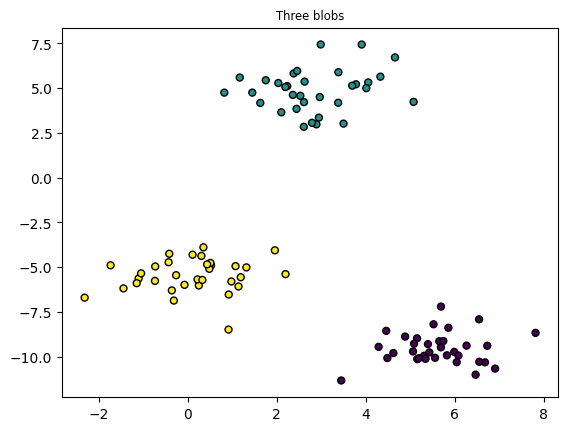

In [16]:
# https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
# https://blog.floydhub.com/introduction-to-k-means-clustering-in-python-with-scikit-learn/
from sklearn.datasets import make_blobs
plt.title("Three blobs", fontsize='small')Mrs Mihai
X1, Y1 = make_blobs(n_features=2, centers=3, random_state=10)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

Text(0.5, 1.0, 'Data points and cluster centroids')

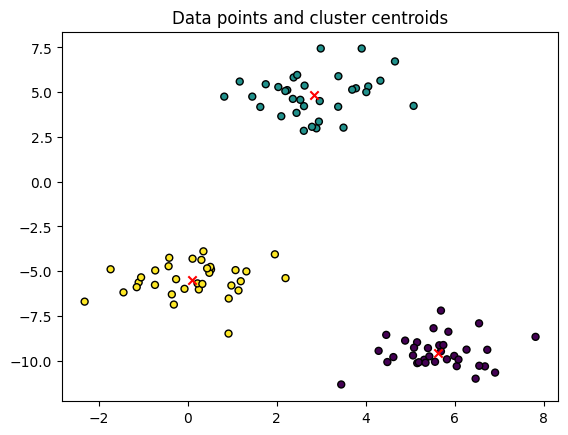

In [17]:
from sklearn.cluster import KMeans
    
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X1)
# Get the cluster centroids

# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

In [21]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
Y = data.target
print(data.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
accuracy

LogisticRegression(random_state=0)

0.958041958041958

In [25]:
# WDBC-Malignant -- 10
# WDBC-Benign -- 390

390/400 # we don't know if this is good

0.975

In [26]:
# WDBC-Malignant -- 390
# WDBC-Benign -- 10
390/400

0.975

In [27]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[50,  3],
       [ 3, 87]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

[[TP, FN]
[FP, TN]]

In [ ]:
# WDBC-Malignant -- 10
# WDBC-Benign -- 390

TP = 0
TN = 390
FN = 10
FP = 0 

0|10
0|390

precision = tp / (tp+fp)

0 / (0 + 0)

In [28]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.97      0.97      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



True Negative
True Positive
False Positive
False Negative
Specificity # how good a picking up negative
Sensitivity # sensitive to positive
Precision 
Recall # sensitivity

In [29]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

SVC(random_state=0)

0.965034965034965

array([[50,  3],
       [ 2, 88]])

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

0.972027972027972

array([[52,  1],
       [ 3, 87]])

In [31]:
for score, name in sorted(zip(classifier.feature_importances_, data.feature_names), reverse=True):
    print(round(score, 2), name)

0.14 mean concave points
0.14 worst perimeter
0.11 worst concave points
0.1 area error
0.08 worst area
0.06 mean concavity
0.05 radius error
0.05 mean area
0.04 worst radius
0.04 mean perimeter
0.03 mean texture
0.02 worst texture
0.02 worst fractal dimension
0.02 mean radius
0.01 perimeter error
0.01 worst concavity
0.01 concavity error
0.01 mean fractal dimension
0.01 mean smoothness
0.01 fractal dimension error
0.01 worst compactness
0.01 mean compactness
0.01 worst symmetry
0.01 concave points error
0.01 symmetry error
0.01 worst smoothness
0.0 compactness error
0.0 texture error
0.0 mean symmetry
0.0 smoothness error


In [32]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(Y_test, Y_pred)


from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)

<Figure size 640x480 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic example')

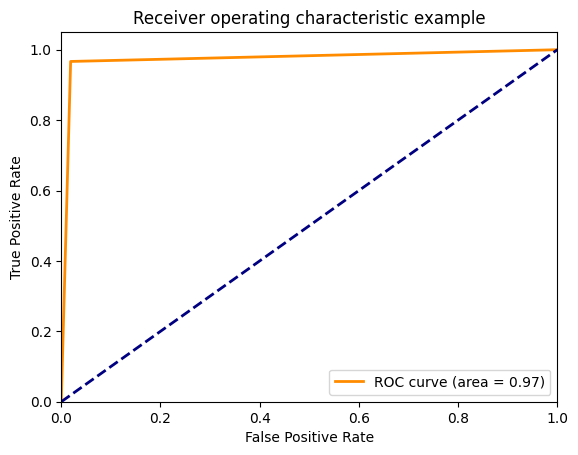

In [33]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()